In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [41]:
baseball_url = 'https://drive.google.com/uc?export=download&id=1-4lEGbDkQi8Wy6h940tpbiMmcfQFxq8E'
baseball = pd.read_csv(baseball_url)
baseball

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


What we want to do is study Pitchers and NotPitchers and see what the differences are.

In [43]:
# First we recode the Position to Pitcher and not Pitcher. We do this with a dictionary.

pos = set(baseball.loc[:, 'Position'])
pos

{'Catcher',
 'Designated_Hitter',
 'First_Baseman',
 'Outfielder',
 'Relief_Pitcher',
 'Second_Baseman',
 'Shortstop',
 'Starting_Pitcher',
 'Third_Baseman'}

In [51]:
recode_pitch = { x:'Pitcher' for x in pos if 'Pitcher' in x }
# First for any position which has the word Pitcher, we recode that to just be Pitcher.

recode_pitch.update({ x:'NotPitcher' for x in pos if not 'Pitcher' in x})
# Then recode the ones that do not use the word Pitcher

# Python lets us update dictionaries.
recode_pitch

{'Starting_Pitcher': 'Pitcher',
 'Relief_Pitcher': 'Pitcher',
 'Third_Baseman': 'NotPitcher',
 'Catcher': 'NotPitcher',
 'Shortstop': 'NotPitcher',
 'Second_Baseman': 'NotPitcher',
 'Designated_Hitter': 'NotPitcher',
 'First_Baseman': 'NotPitcher',
 'Outfielder': 'NotPitcher'}

In [52]:
# The map function applied to a series using a dictionary maps the values in the column through the dictionary.

baseball.loc[:, 'Position'].map(recode_pitch)

0       NotPitcher
1       NotPitcher
2       NotPitcher
3       NotPitcher
4       NotPitcher
           ...    
1029       Pitcher
1030       Pitcher
1031       Pitcher
1032       Pitcher
1033       Pitcher
Name: Position, Length: 1034, dtype: object

In [54]:
# So now fix the column
baseball.loc[:, 'Position'] = baseball.loc[:, 'Position'].map(recode_pitch)

<AxesSubplot:xlabel='Height(inches)', ylabel='Count'>

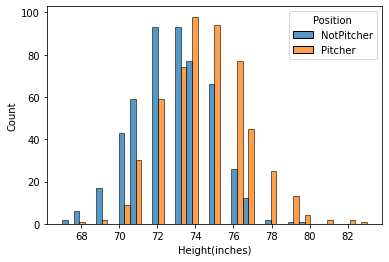

In [64]:
sns.histplot(data = baseball, x='Height(inches)', hue='Position', multiple='dodge')

<AxesSubplot:xlabel='Height(inches)', ylabel='Position'>

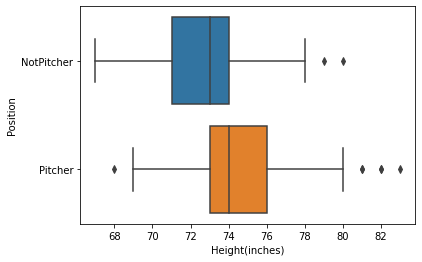

In [66]:
sns.boxplot(data=baseball, x='Height(inches)', y='Position')

Our question is:  Are Pitchers significiantly taller?

In [67]:
baseball.groupby('Position').mean()

,Height(inches),Weight(pounds),Age
Position,,,
NotPitcher,72.815261,198.997992,29.083414
Pitcher,74.516791,204.194393,28.414590


In [68]:
baseball.groupby('Position').count()

,Name,Team,Height(inches),Weight(pounds),Age
Position,,,,,
NotPitcher,498,498,498,498,498
Pitcher,536,536,536,535,536


In [73]:
498+536

1034

In [69]:
# We are going to need Python's pseudo random number generators to randomize our samples
# Note that these are not truly random numbers. They start with a seed, and then algorithmically choose the results
# This means, if you use the same seed, you get the same sequence.

# These numbers though, as we change the seed, will behave like random numbers and share many of their properties.

import random

# the default is for random to use the system clock on your computer to get the seed, this because it uses seconds,
# is unpredictiable enough for most applications

# When testing your code, it can be useful to set the seed so the same sequence always happens
# random.seed(123)

In [72]:
# Check what the command random.sample is doing

random.sample([44, 55, 33, 33, 44, 22, 11, 11, 11, 11, 0, 0, 55, 55], 5)

[0, 33, 11, 44, 44]

## Our Hypothesis: The mean height of pitchers at 74.5 inches is taller than non-Pitchers

The alternative is that the sample of Pitchers being taller was just a result of randomly choosing 536 players out of 1034 ballplayers and just ending up with the taller ones. To see if this could actually be the case, what we are going to do is select sets of 536 ball players from our sample over and over computing the mean teach time, and see how often we end up with a mean of 74.5 inches or more.

---

In a traditional Statistics class you would explore this question by building up some formulas that you could then use to make a decision Yes/No that Nixon was more likely to grant pardons than the other presidents.  However with computing technology where it is today, there is now a better way. And provided that we run the experiment often enough it will give the same result as the traditional method.

The idea is to actually run the experiment. What we will do is draw the set of petitions for Nixon over and over from a population that has 19.9% of them being acceptable to our "idealized president" and see how often the proportion gets close to the 50% acceptable that Nixon ended up with. What we will then have is an estimate of how likely it was that Nixon found himself in this position.

In [74]:
size = 536

In [77]:
# Let's make this a function so we don't have to retype it all the time

def experiment(N, s = size, population = list(baseball.loc[:, 'Height(inches)'])):
    # N is the number of times to run the experiment
    # s is a variable that will let us change the size of the sample to pull, the default value size is the number
    # of petitions that Nixon received

    result = pd.DataFrame([], columns = ['Mean Heights']) # Make a dataframe to catalogue the results
    # Note I drop the size, because every sample will have the same size.
    
    for k in range(N):
        
        # random.choices(population, size)  
        # use this command if we are sampling from the population with replacement
    
        sample = np.mean(random.sample(population, s))
        # use this command if we are sampling from the population without replacement
    
        row = pd.DataFrame([sample], 
                       index = ['Mean Heights']).transpose()
    
        result = result.append(row)
    
    return result.reset_index().iloc[:, 1:]

<AxesSubplot:xlabel='Mean Heights', ylabel='Count'>

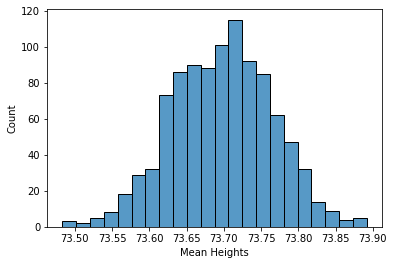

In [81]:
result = experiment(1000)
sns.histplot(data=result, x='Mean Heights')

<AxesSubplot:xlabel='Mean Heights'>

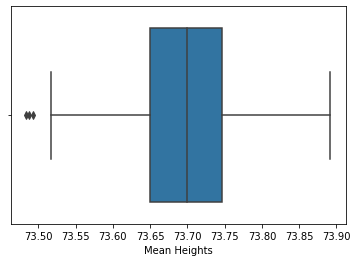

In [82]:
sns.boxplot(data=result, x='Mean Heights')

And we see that it never happened!  Which is actually remarkable given that there are many more pitchers than not pitchers.

### Warnings

Some things to be careful of. If the number of non-pitchers was small this technique needs to be tweaked a bit. Changing to sampling with replacement is a first adjustment. But making predictions about small events is hard. Drug use data for example is problematic because the actual prevalence of some drugs in the general population is very low.

## Presidential Pardons Data

I pulled this dataset from kaggle.com.  It is a list of the number of pardons petitions received and granted by US Presidents in the last 75 years.

In [ ]:
presidents_url = 'https://drive.google.com/uc?export=download&id=1U56rjU1el9mxuHp94a8tqUVuqMU4N1uk'
presidents = pd.read_csv(presidents_url)
presidents = presidents.iloc[:, [0, 4, 7]]
presidents = presidents.groupby('President').sum().reset_index()
presidents

In [ ]:
presidents.loc[:, 'Proportion Granted'] = presidents.iloc[:, 2]/presidents.iloc[:, 1]
presidents

In [ ]:
# Total proportion of petitions granted

percent_granted = presidents.iloc[:, 2].sum()/presidents.iloc[:, 1].sum()
percent_granted

In [ ]:
sns.barplot(x = 'Proportion Granted', y='President', data=presidents, color='lightblue');

In [ ]:
size = int(presidents.loc[6, 'Petitions Received (Pardons)'])  # set the size of the sample to pull
# Note I needed to convert this to int()

total_petitions = int(presidents.loc[:, 'Petitions Received (Pardons)'].sum()) # Note I needed to convert these to int
total_granted = int(presidents.loc[:, 'Pardons'].sum()) # Note I needed to convert these to int
total_denied = total_petitions - total_granted # The other two are int, so this will be too.

population = ['granted']*total_granted + ['denied']*total_denied
# Note what we do here. We rebuild the entire population!  We can do this because with our computers, the 
# size of this thing does not matter until we get into the millions. There are other things to do, but 
# this idea of building the whole population and simmulating from it is the most generic.

# Also note how easy it is to build our population in Python. 
# ['granted'] * total_granted make a list of length total_granted where each entry is 'granted'

### Our Hypothesis:  Nixon granted an unusually large proportion of the pardon petitions he recieved.

The alternative is that in fact Nixon just randomly recieved a larger proportion of acceptable pardons. 

Note things break a little bit here, as we are assuming in our alternative that who the president is does not have an affect on who decides to petition them. We should try to find out for example what was the mean sentence for the petitions that a president received. 

In [ ]:
# Let's make this a function so we don't have to retype it all the time

def experiment(N, s = size):
    # N is the number of times to run the experiment
    # s is a variable that will let us change the size of the sample to pull, the default value size is the number
    # of petitions that Nixon received

    result = pd.DataFrame([], columns = ['Pardons', 'Proportion Granted']) # Make a dataframe to catalogue the results
    # Note I drop the size, because every sample will have the same size.
    
    for k in range(N):
        
        # random.choices(population, size)  
        # use this command if we are sampling from the population with replacement
    
        sample = random.sample(population, s)
        # use this command if we are sampling from the population without replacement
    
        row = pd.DataFrame([sample.count('granted'), sample.count('granted')/s], 
                       index = ['Pardons', 'Proportion Granted']).transpose()
    
        result = result.append(row)
    
    return result.reset_index().iloc[:, 1:]


In [ ]:
result1000 = experiment(1000)
result1000

In [ ]:
# So did any of these 1000 experimental Nixon's samples ever get close to real Nixon's 50%?

sns.displot(result1000, x='Proportion Granted')

In [ ]:
sns.boxplot(x='Proportion Granted', data=result1000)

So in 1000 attempts we got nowhere near Nixon's rate. This implies that indeed Nixon was a unique president in the use of the pardon power.

Let's note that if the sample size is smaller (i.e. if the number of requests is low, the question changes).

Run this a few times and note that the figure does not change much. 

Our estimate is that the probability that any president would approve 50% of their pardon requests is less than 1 in 1000 or less than 0.1 precent. We may want to run the experiment for 10000 times to see if we can get a finer result. Note that this does take time.

In [ ]:
result10000 = experiment(10000)
sns.displot(result1000, x='Proportion Granted')

We again see that it is very unlikely.

Just to illustrate how the sample sizes affects the spread of the results, consider a sample size of 10.  We expect to have some of these with a 5 in 10 or larger number of 'granted'

In [ ]:
result1000 = experiment(1000, s=10)
sns.displot(result1000, x='Proportion Granted')

In [ ]:
sns.boxplot(x='Proportion Granted', data=result1000)

In [ ]:
(result1000.loc[:, 'Proportion Granted'] >= 0.5).sum()

So if the samples are of size 10, then 37 times our of 1000 we find more than 50% of the pardons approved by all presidents. So that puts the probability at 3.7 %.

Note the precise number will vary every time we run this, though if we do the experiment more it will become more stable.

Also note that the Bell Shape we saw in the previous exampls is breaking down here. This is because the propotion stops at 0.0, and so the result sort of stack up there. This is an example of where the resampling experiment is providing better information than a more traditional statistics approach.

## Let's do another example

This dataset is from the PPP loans given out as part of the CARES Act in 2020. It is a database on the loans awarded for more than $150,000 witha. bit of information about who they were awarded to.

I pulled this dataset from a project on kaggle.com

In [ ]:
# This is a big data set and it did not play well with Google Drive.
PPP = pd.read_csv('PPP_data_150k_plus.csv').iloc[:, [0, 4, -4]] # only three columns for what we want to do today
PPP

In [ ]:
set(PPP.loc[:, 'LoanRange'])

Note this is a nice example as it the first one we are doing where the size of the file is too big to open in Excel or similar on many computers. It is a dataset that really needs to be dealt with by a tool like Python or R.

What type of variable are we getting for 'LoanRange'?

In [ ]:
# Let's drop the ones we have no State assigned to.
# In reality it would probably be worth figuring out why some of them do not have a state assigned.

no_state_index = PPP.loc[:, 'State'] == 'XX'
no_state = PPP.loc[no_state_index, :]
state = PPP.drop(no_state.index, axis=0)
state

How many jobs were retained by the loans by value:

In [ ]:
state_by_value = state.groupby(['State', 'LoanRange']).mean()
state_by_value

In [ ]:
# Note this is a multi-index. It is possible to peal off the first one 
# specifying a state we want to look more closely at

state_by_value.loc['CO', :]

How did Colorado do compared to the whole country:

In [ ]:
whole_by_value = state.groupby('LoanRange').mean()
whole_by_value

In [ ]:
large_loans = state.loc[ state.loc[:, 'LoanRange']=='a $5-10 million']
# We will drop the ones that are missing 'JobsRetained' values. It would be nice with more time to understand
# why these are missing for some.
large_loans = large_loans.loc[ pd.notna(large_loans.loc[:, 'JobsRetained'])]
sns.histplot(large_loans.iloc[:, -1])

Again worth pausing here and pointing out:  Note a nice bell curve.

In [ ]:
# We can visualize the distribution with a boxplot also
sns.boxplot(x = 'JobsRetained', data = large_loans)

Now we do our sampling expriment to see if Colorado was unique or not. In this case the dataset we will sample from is already built for us, it is the state dataframe with the jobs saved for each PPP loan in the large category.

In [ ]:
# We need to know how large the sample was (and also check for missing values)
large_loans.groupby('State').count()

In [ ]:
size = 90

In [ ]:
# Let's make this a function so we don't have to retype it all the time

def experiment(N, s = size, population = list(large_loans.loc[:, 'JobsRetained'])):
    # N is the number of times to run the experiment
    # s is a variable that will let us change the size of the sample to pull, the default value size is the number
    # of large loans in Colorado

    result = pd.DataFrame([], columns = ['Mean Jobs Retained']) # Make a dataframe to catalogue the results
    
    for k in range(N):
        
        # random.choices(population, size).mean()  
        # use this command if we are sampling from the population with replacement
    
        sample = np.mean(random.sample(population, s))
        # use this command if we are sampling from the population without replacement
    
        row = pd.DataFrame([sample], 
                       index = ['Mean Jobs Retained']).transpose()
    
        result = result.append(row)
    
    return result.reset_index().iloc[:, 1:]


In [ ]:
experiment(10)

In [ ]:
result = experiment(100)
sns.boxplot(x = 'Mean Jobs Retained', data = result)

In [ ]:
sns.histplot(x='Mean Jobs Retained', data=result)

In [ ]:
result.loc[ result.loc[:, 'Mean Jobs Retained']>376.455556].count()